In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Instalar bibliotecas necesarias
!pip install pillow opencv-python-headless matplotlib


Mounted at /content/drive


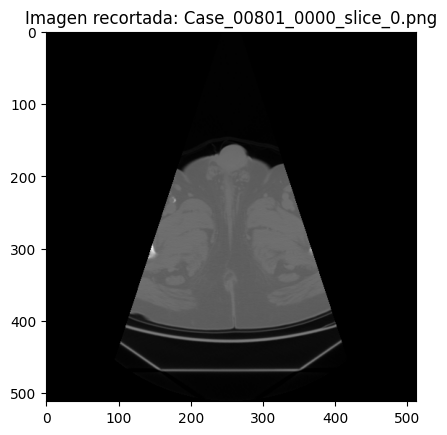

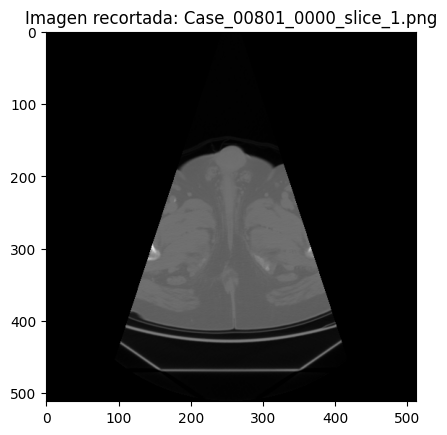

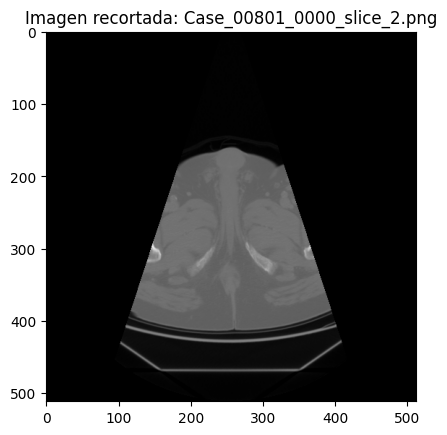

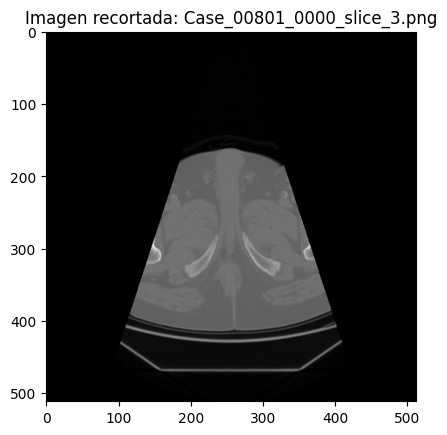

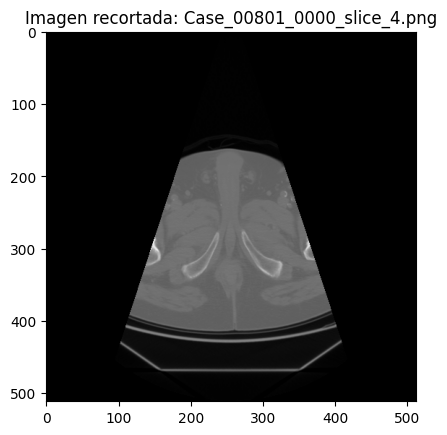

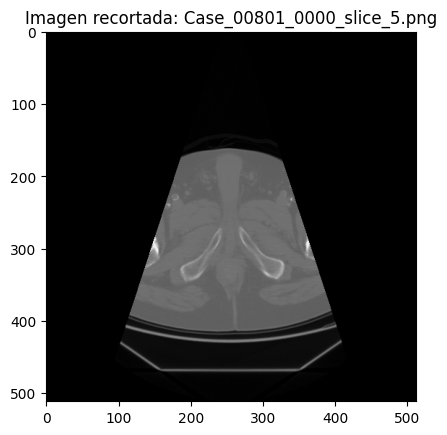

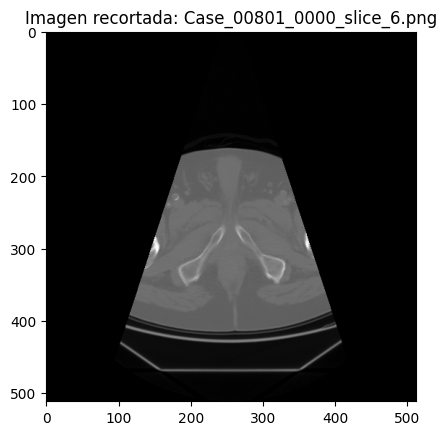

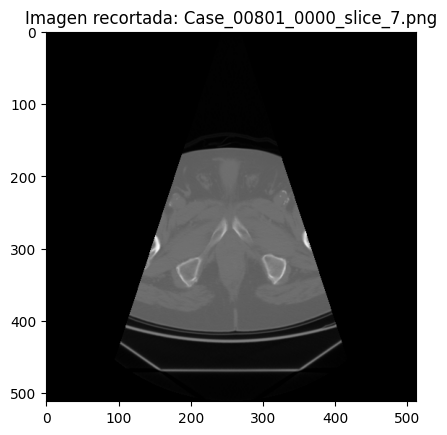

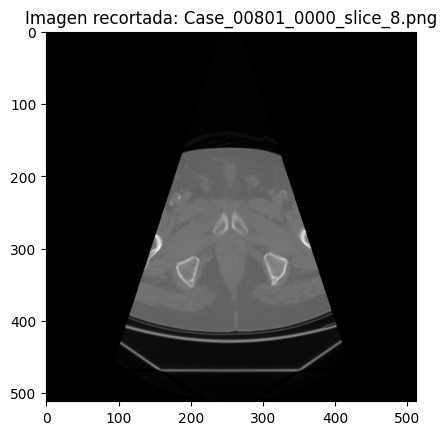

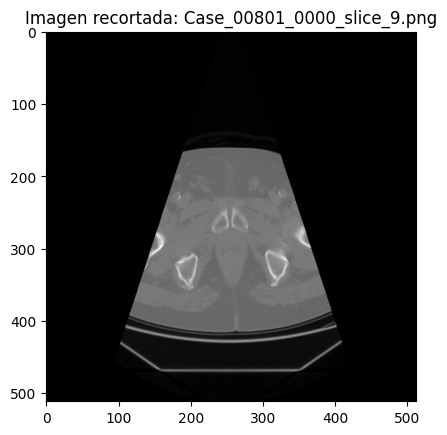

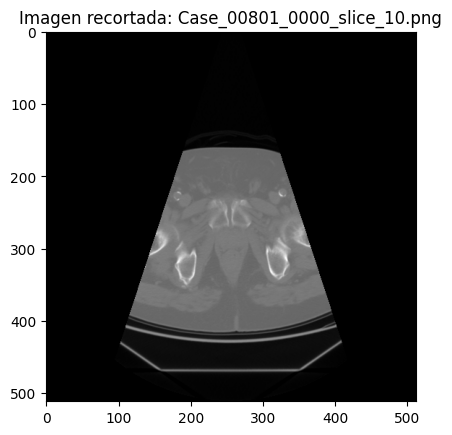

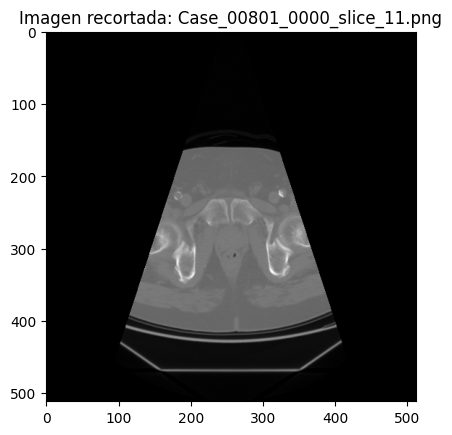

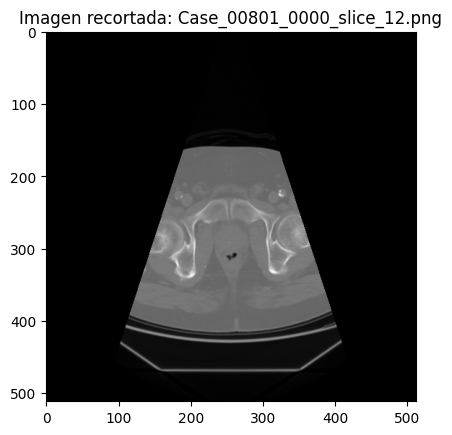

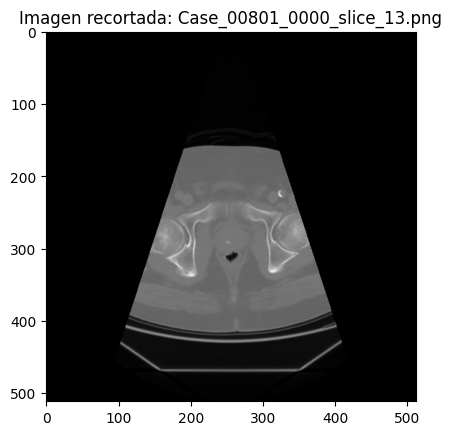

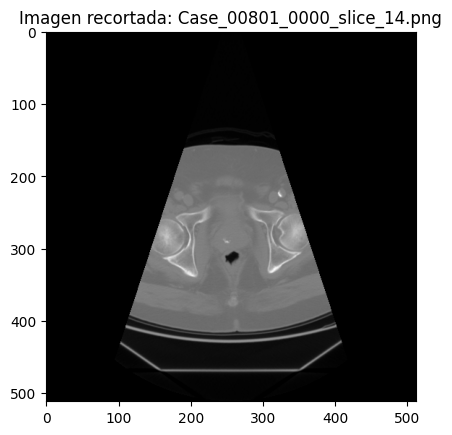

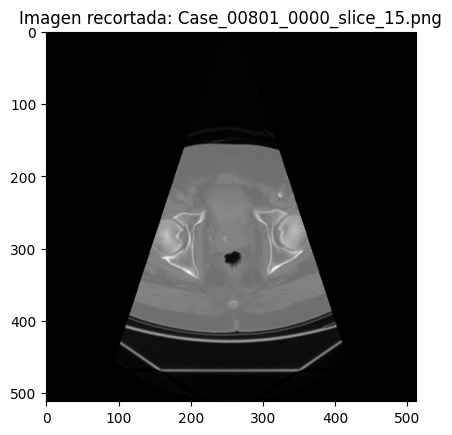

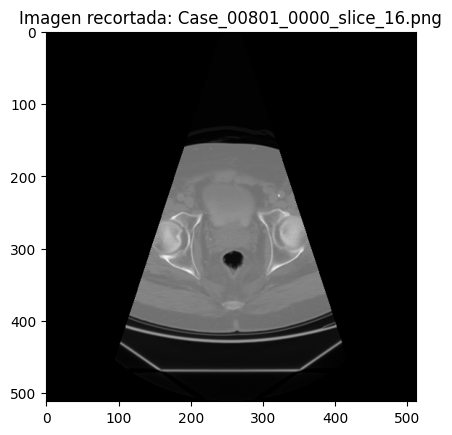

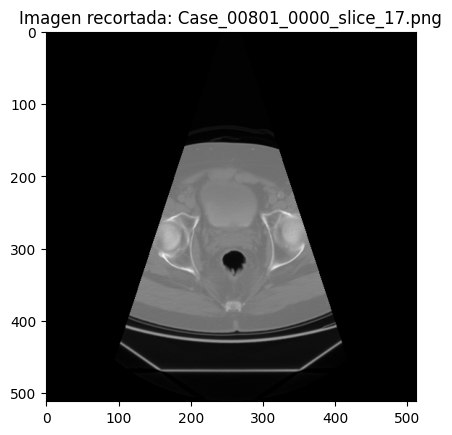

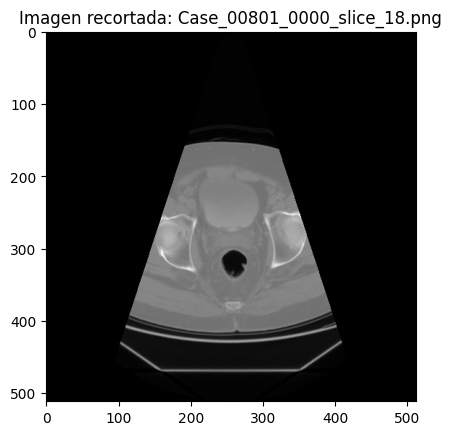

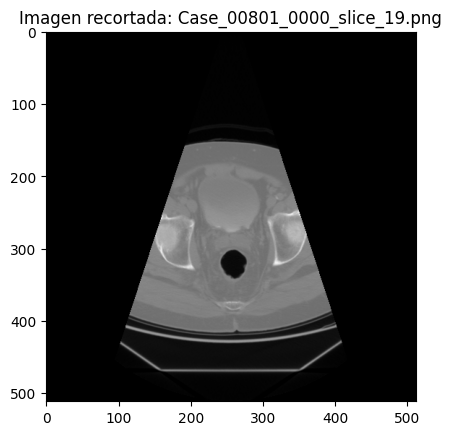

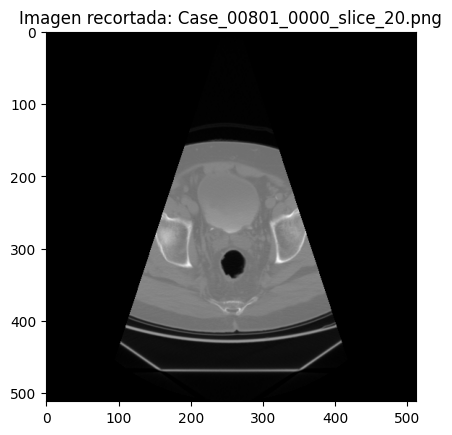

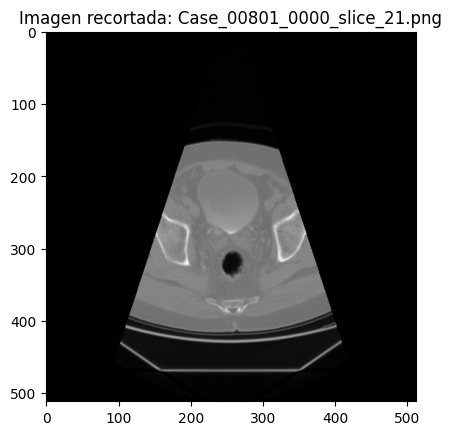

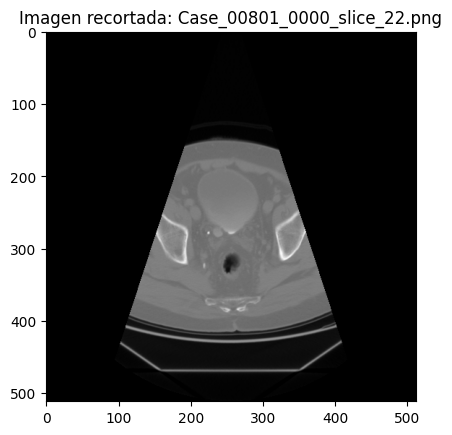

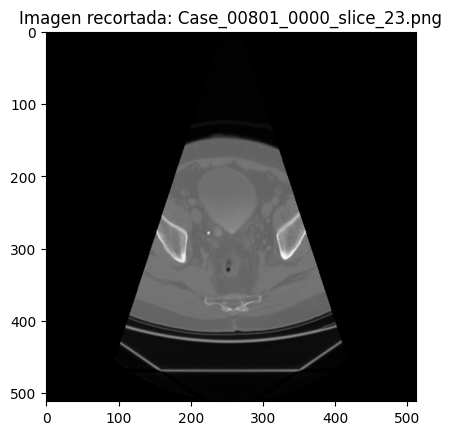

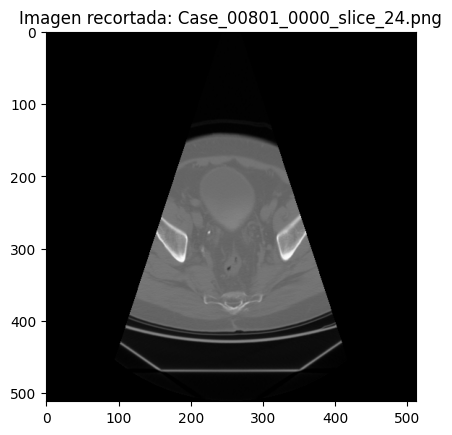

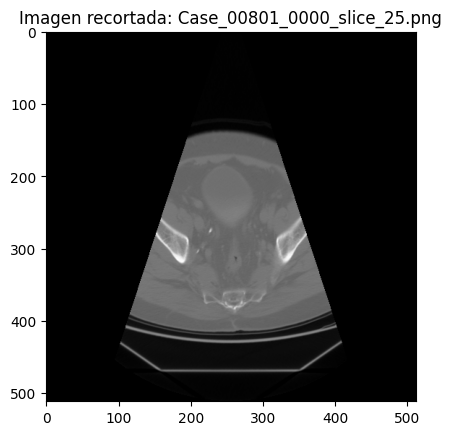

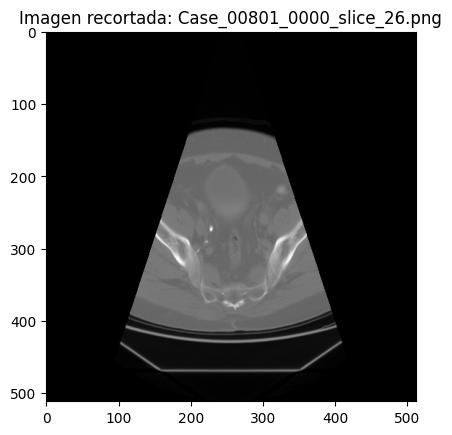

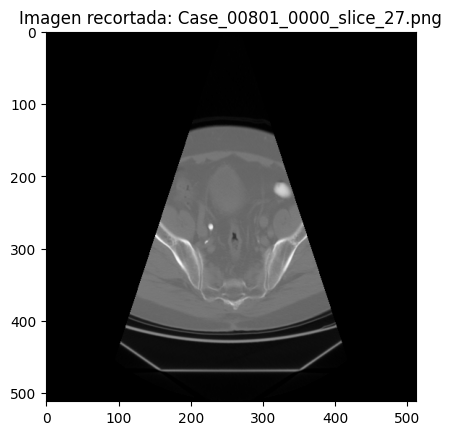

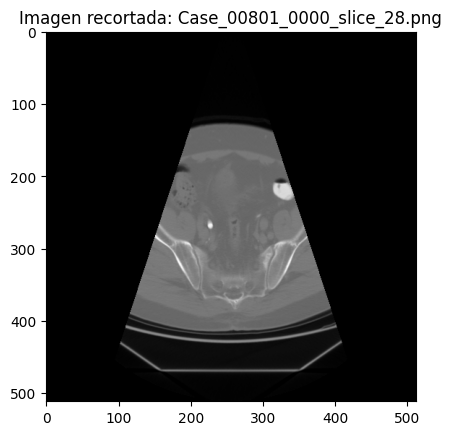

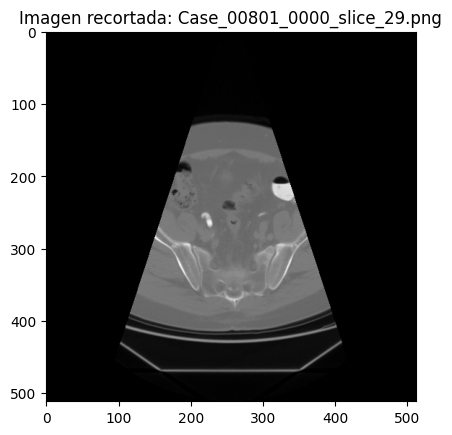

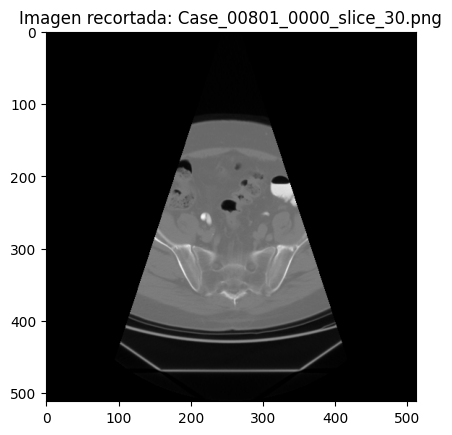

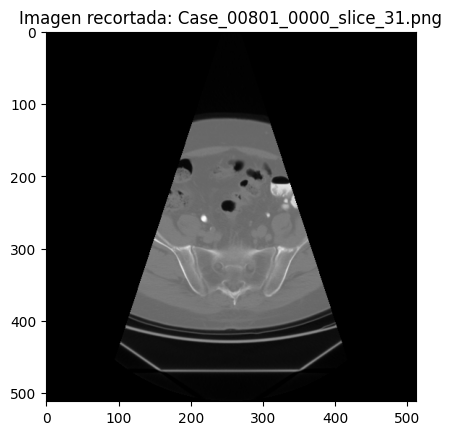

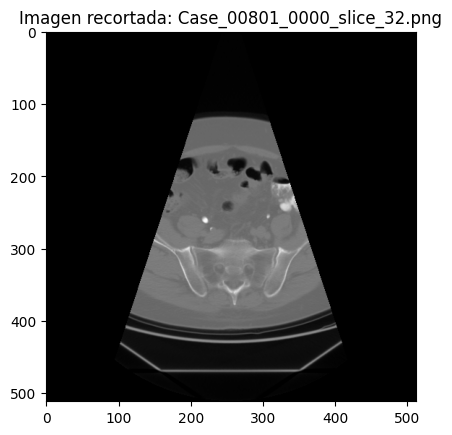

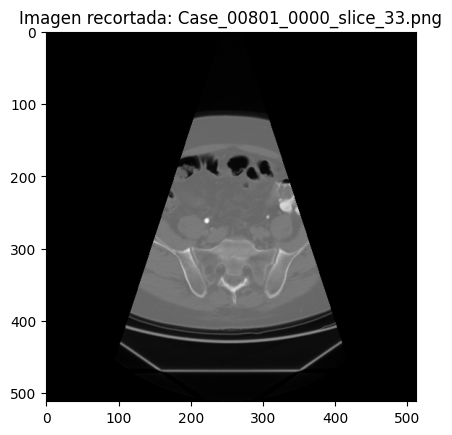

KeyboardInterrupt: 

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ruta a la carpeta de las imágenes en Google Drive
image_folder = '/content/drive/MyDrive/Dataset_ACSI/CT_acsi_proce_p1/'

# Listar todos los archivos en la carpeta
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

# Función para aplicar la máscara en forma de trapecio
def trapezoid_mask(image, top_width_ratio=0.05, bottom_width_ratio=0.70, height_ratio=1.0):
    h, w = image.shape[:2]

    # Definir las proporciones del trapecio
    top_width = int(w * top_width_ratio)  # Ancho de la parte superior del trapecio
    bottom_width = int(w * bottom_width_ratio)  # Ancho de la parte inferior del trapecio
    height = int(h * height_ratio)  # Altura del trapecio (en este caso, la altura completa de la imagen)

    # Coordenadas de los cuatro vértices del trapecio
    top_left = (w // 2 - top_width // 2, 0)
    top_right = (w // 2 + top_width // 2, 0)
    bottom_left = (w // 2 - bottom_width // 2, height)
    bottom_right = (w // 2 + bottom_width // 2, height)

    # Crear una máscara negra (de fondo)
    mask = np.zeros((h, w), dtype=np.uint8)

    # Definir el trapecio
    points = np.array([[top_left, top_right, bottom_right, bottom_left]], dtype=np.int32)

    # Rellenar el trapecio en la máscara
    cv2.fillPoly(mask, points, 255)

    # Aplicar la máscara a la imagen
    result = cv2.bitwise_and(image, image, mask=mask)

    return result

# Carpeta de salida para las imágenes recortadas
output_folder = '/content/drive/MyDrive/Dataset_ACSI/CT_acsi_proce_p1_cropped/'
os.makedirs(output_folder, exist_ok=True)

# Aplicar el recorte tipo trapecio a todas las imágenes
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    try:
        # Cargar la imagen
        image = cv2.imread(image_path)

        if image is None:
            print(f"Error al cargar la imagen {image_file}.")
            continue

        # Aplicar el recorte tipo trapecio
        cropped_image = trapezoid_mask(image)

        # Guardar la nueva imagen
        output_path = os.path.join(output_folder, image_file)
        cv2.imwrite(output_path, cropped_image)

        # Mostrar la imagen recortada (opcional)
        plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Imagen recortada: {image_file}")
        plt.show()

    except Exception as e:
        print(f"Error al procesar {image_file}: {e}")


In [ ]:
from PIL import Image
import os

# Ruta de la imagen dentro del dataset
ruta_imagen = '/content/drive/MyDrive/Dataset_ACSI/US_acsi/aus2rus/aus2rus/trainB'
#Puedes testear el codigo con trainA, trainB, testA, testB. Estas imagenes estan con una dimensión de 256x256. Las imagenes que tenemos en CT son de 512x512
#haré un codigo para modificar el tamaño de las imagenes de CT.

# Obtener una lista de archivos en la carpeta
imagenes = os.listdir(ruta_imagen)

# Filtrar por archivos de imagen comunes (puedes ajustar las extensiones según sea necesario)
imagenes = [img for img in imagenes if img.endswith(('.png', '.jpg', '.jpeg'))]

# Verificar si hay imágenes en la carpeta
if imagenes:
    # Ruta completa de la primera imagen
    primera_imagen = os.path.join(ruta_imagen, imagenes[0])

    # Abrir la imagen
    with Image.open(primera_imagen) as img:
        # Obtener las dimensiones (ancho, alto)
        dimensiones = img.size
        print(f'Las dimensiones de la imagen son: {dimensiones}')
else:
    print('No se encontraron imágenes en la carpeta especificada.')


Las dimensiones de la imagen son: (256, 256)


In [ ]:
#from PIL import Image
import os

# Ruta de la carpeta de imágenes originales de 512x512
ruta_origen = '/content/drive/MyDrive/Dataset_ACSI/CT_acsi_proce_p1_cropped'

# Ruta de la carpeta destino para guardar las imágenes redimensionadas (puedes cambiarla)
ruta_destino = '/content/drive/MyDrive/Dataset_ACSI/CT_acsi_proce_p1_cropped_256x256'

# Crear la carpeta destino si no existe
if not os.path.exists(ruta_destino):
    os.makedirs(ruta_destino)

# Obtener una lista de archivos en la carpeta
imagenes = os.listdir(ruta_origen)

# Filtrar por archivos de imagen comunes (puedes ajustar las extensiones según sea necesario)
imagenes = [img for img in imagenes if img.endswith(('.png', '.jpg', '.jpeg'))]

# Tamaño de salida deseado
nuevo_tamano = (256, 256)

# Redimensionar todas las imágenes
for imagen in imagenes:
    # Ruta completa de la imagen original
    ruta_imagen_original = os.path.join(ruta_origen, imagen)

    # Ruta donde se guardará la imagen redimensionada
    ruta_imagen_nueva = os.path.join(ruta_destino, imagen)

    # Abrir la imagen original
    with Image.open(ruta_imagen_original) as img:
        # Redimensionar la imagen
        img_redimensionada = img.resize(nuevo_tamano)

        # Guardar la imagen redimensionada en la ruta de destino
        img_redimensionada.save(ruta_imagen_nueva)

    print(f'Imagen {imagen} redimensionada y guardada en {ruta_imagen_nueva}')

print('Todas las imágenes han sido redimensionadas correctamente.')


Imagen Case_00801_0000_slice_0.png redimensionada y guardada en /content/drive/MyDrive/Dataset_ACSI/CT_acsi_proce_p1_cropped_256x256/Case_00801_0000_slice_0.png
Imagen Case_00801_0000_slice_1.png redimensionada y guardada en /content/drive/MyDrive/Dataset_ACSI/CT_acsi_proce_p1_cropped_256x256/Case_00801_0000_slice_1.png
Imagen Case_00801_0000_slice_2.png redimensionada y guardada en /content/drive/MyDrive/Dataset_ACSI/CT_acsi_proce_p1_cropped_256x256/Case_00801_0000_slice_2.png
Imagen Case_00801_0000_slice_3.png redimensionada y guardada en /content/drive/MyDrive/Dataset_ACSI/CT_acsi_proce_p1_cropped_256x256/Case_00801_0000_slice_3.png
Imagen Case_00801_0000_slice_4.png redimensionada y guardada en /content/drive/MyDrive/Dataset_ACSI/CT_acsi_proce_p1_cropped_256x256/Case_00801_0000_slice_4.png
Imagen Case_00801_0000_slice_5.png redimensionada y guardada en /content/drive/MyDrive/Dataset_ACSI/CT_acsi_proce_p1_cropped_256x256/Case_00801_0000_slice_5.png
Imagen Case_00801_0000_slice_6.png

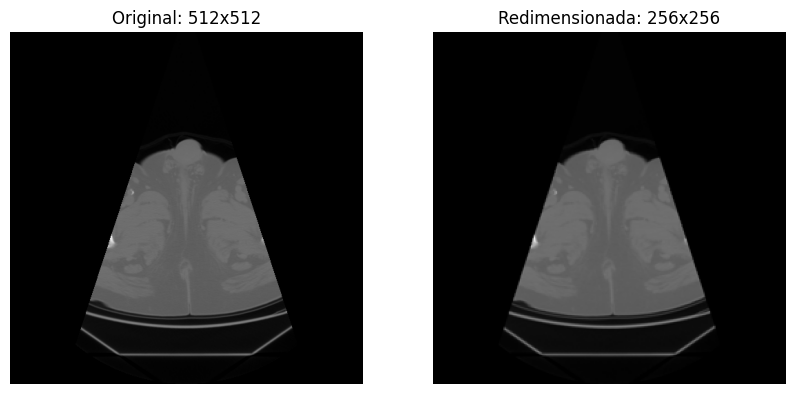

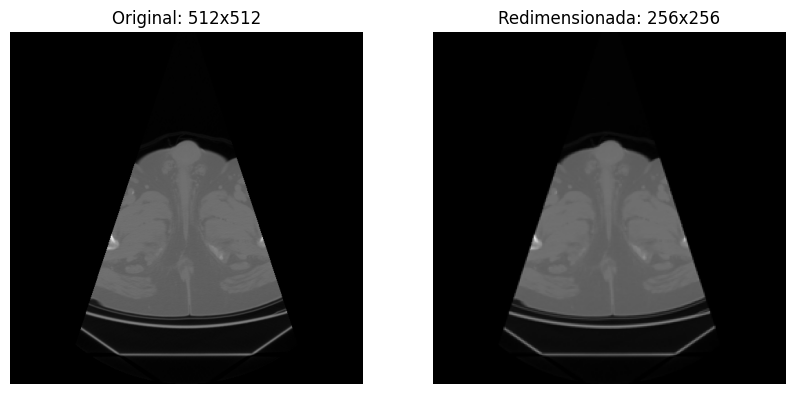

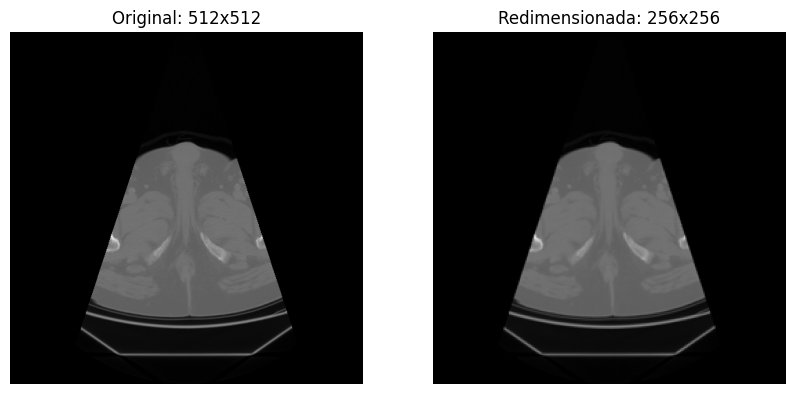

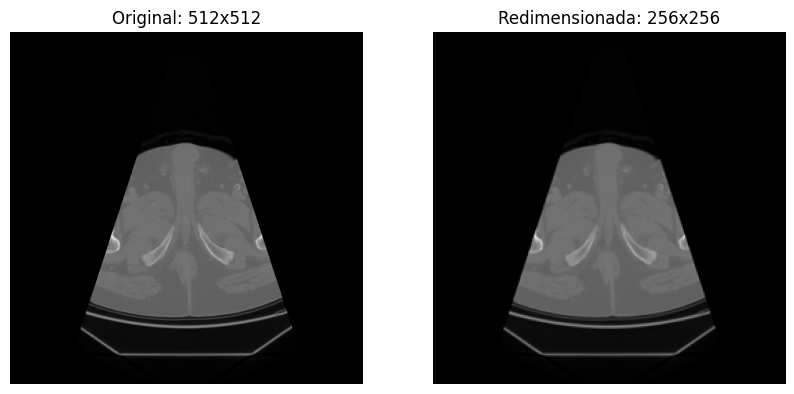

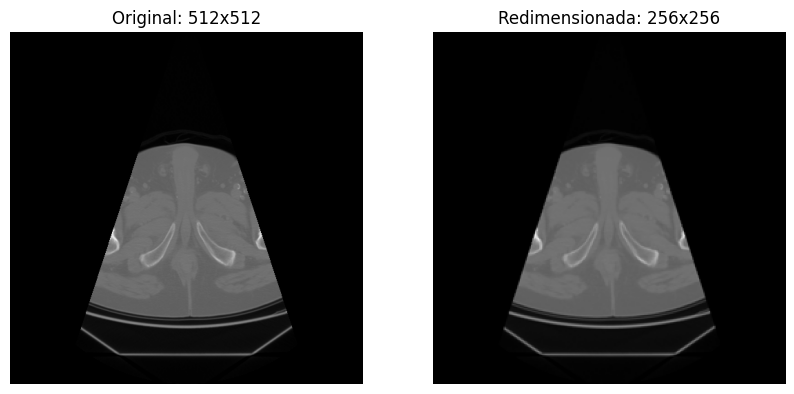

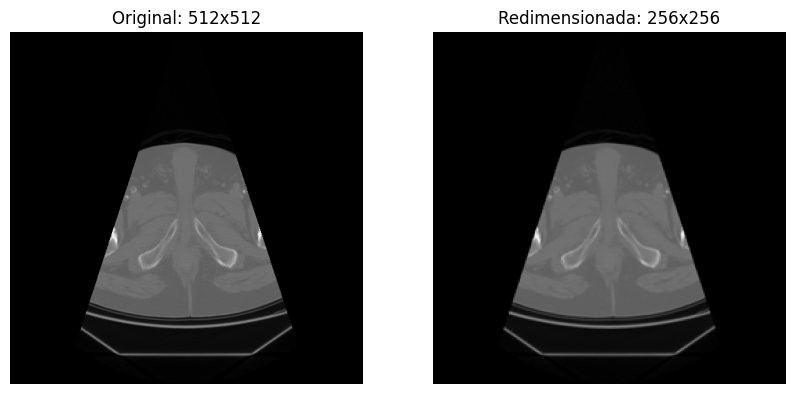

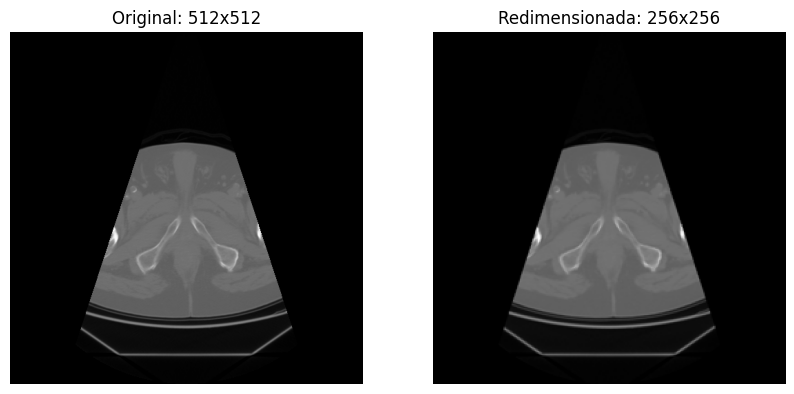

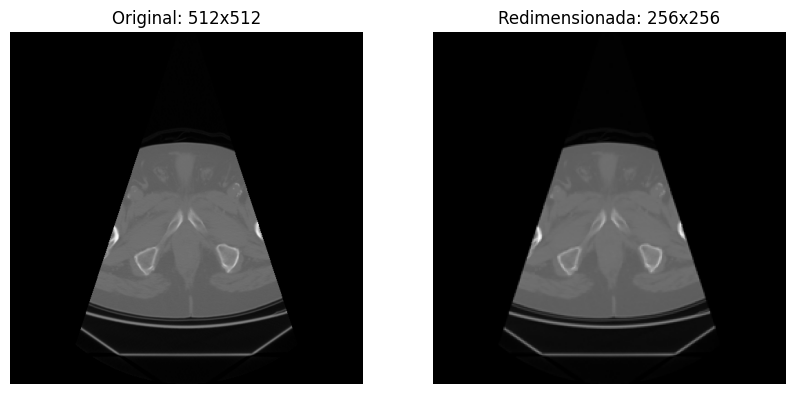

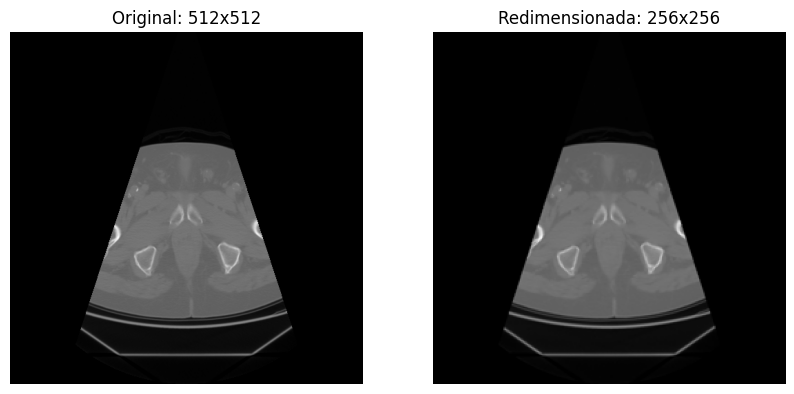

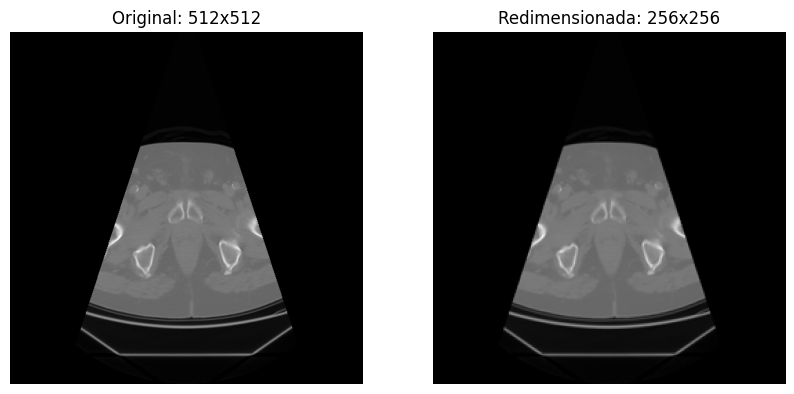

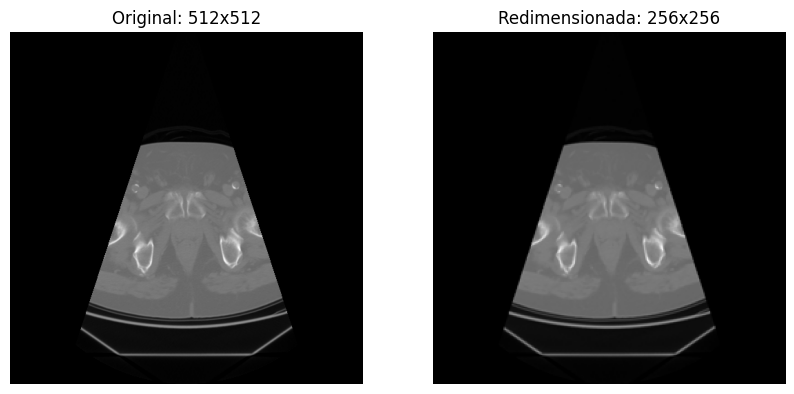

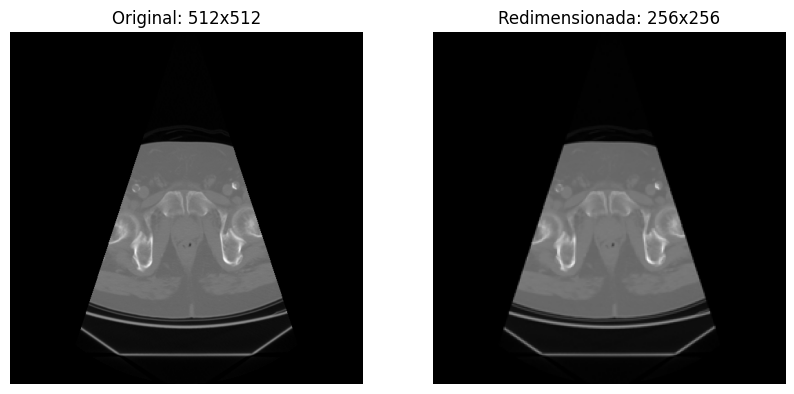

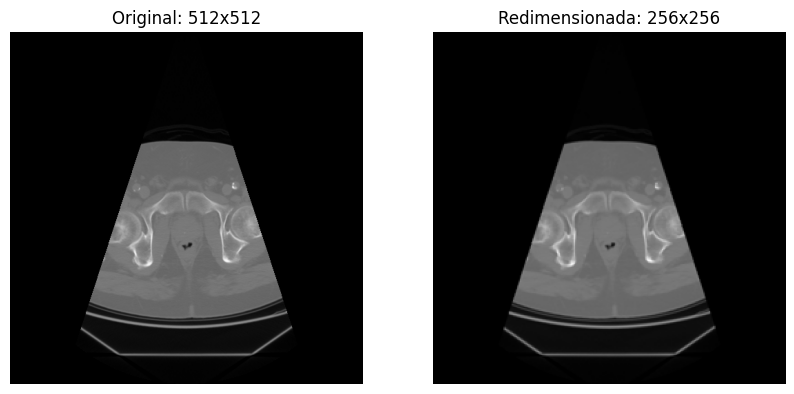

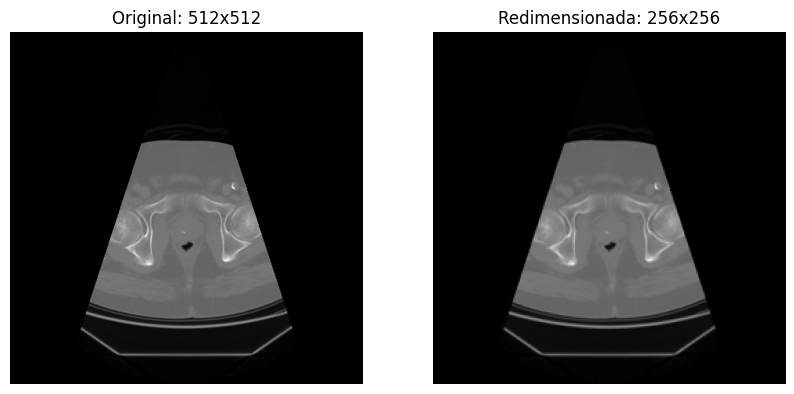

KeyboardInterrupt: 

<Figure size 1000x500 with 0 Axes>

In [ ]:
from PIL import Image
import os
import matplotlib.pyplot as plt

# Rutas de las carpetas de imágenes
ruta_origen = '/content/drive/MyDrive/Dataset_ACSI/CT_acsi_proce_p1_cropped'
ruta_redimensionada = '/content/drive/MyDrive/Dataset_ACSI/CT_acsi_proce_p1_cropped_256x256'

# Obtener lista de imágenes
imagenes_origen = os.listdir(ruta_origen)
imagenes_origen = [img for img in imagenes_origen if img.endswith(('.png', '.jpg', '.jpeg'))]

# Mostrar las imágenes originales y redimensionadas
for imagen in imagenes_origen:
    # Ruta de la imagen original
    ruta_imagen_origen = os.path.join(ruta_origen, imagen)

    # Ruta de la imagen redimensionada
    ruta_imagen_redimensionada = os.path.join(ruta_redimensionada, imagen)

    # Abrir ambas imágenes
    with Image.open(ruta_imagen_origen) as img_origen:
        with Image.open(ruta_imagen_redimensionada) as img_redimensionada:
            # Crear la figura
            plt.figure(figsize=(10, 5))

            # Mostrar la imagen original con dimensiones
            plt.subplot(1, 2, 1)
            plt.imshow(img_origen)
            plt.title(f'Original: {img_origen.size[0]}x{img_origen.size[1]}')
            plt.axis('off')

            # Mostrar la imagen redimensionada con dimensiones
            plt.subplot(1, 2, 2)
            plt.imshow(img_redimensionada)
            plt.title(f'Redimensionada: {img_redimensionada.size[0]}x{img_redimensionada.size[1]}')
            plt.axis('off')

            # Mostrar el resultado
            plt.show()

print('Proceso completado.')


In [ ]:
from PIL import Image
import os

# Ruta de la imagen dentro del dataset
ruta_imagen = '/content/drive/MyDrive/Dataset_ACSI/CT_acsi_proce_p1_cropped_256x256'
#Puedes testear el codigo con trainA, trainB, testA, testB. Estas imagenes estan con una dimensión de 256x256. Las imagenes que tenemos en CT son de 512x512
#haré un codigo para modificar el tamaño de las imagenes de CT.

# Obtener una lista de archivos en la carpeta
imagenes = os.listdir(ruta_imagen)

# Filtrar por archivos de imagen comunes (puedes ajustar las extensiones según sea necesario)
imagenes = [img for img in imagenes if img.endswith(('.png', '.jpg', '.jpeg'))]

# Verificar si hay imágenes en la carpeta
if imagenes:
    # Ruta completa de la primera imagen
    primera_imagen = os.path.join(ruta_imagen, imagenes[0])

    # Abrir la imagen
    with Image.open(primera_imagen) as img:
        # Obtener las dimensiones (ancho, alto)
        dimensiones = img.size
        print(f'Las dimensiones de la imagen son: {dimensiones}')
else:
    print('No se encontraron imágenes en la carpeta especificada.')


Las dimensiones de la imagen son: (256, 256)


Con este dataset de imagenes reacomodadas para parecer de US y redimensionadas ya podriamos trabajarlo en el modelo que estamos tomando en cuenta, creo que el problema más grande será optimizar el codigo ya que debido al hardcoding realizado esto puede generar redundancias en el codigo. A este momento 2 de oct de 3am no hemos encontrado una manera de extraer el modelo lo cual terminará jugando en contra del trabajo final. Trataré de realizar el modelado de este mismo en mi computadora.